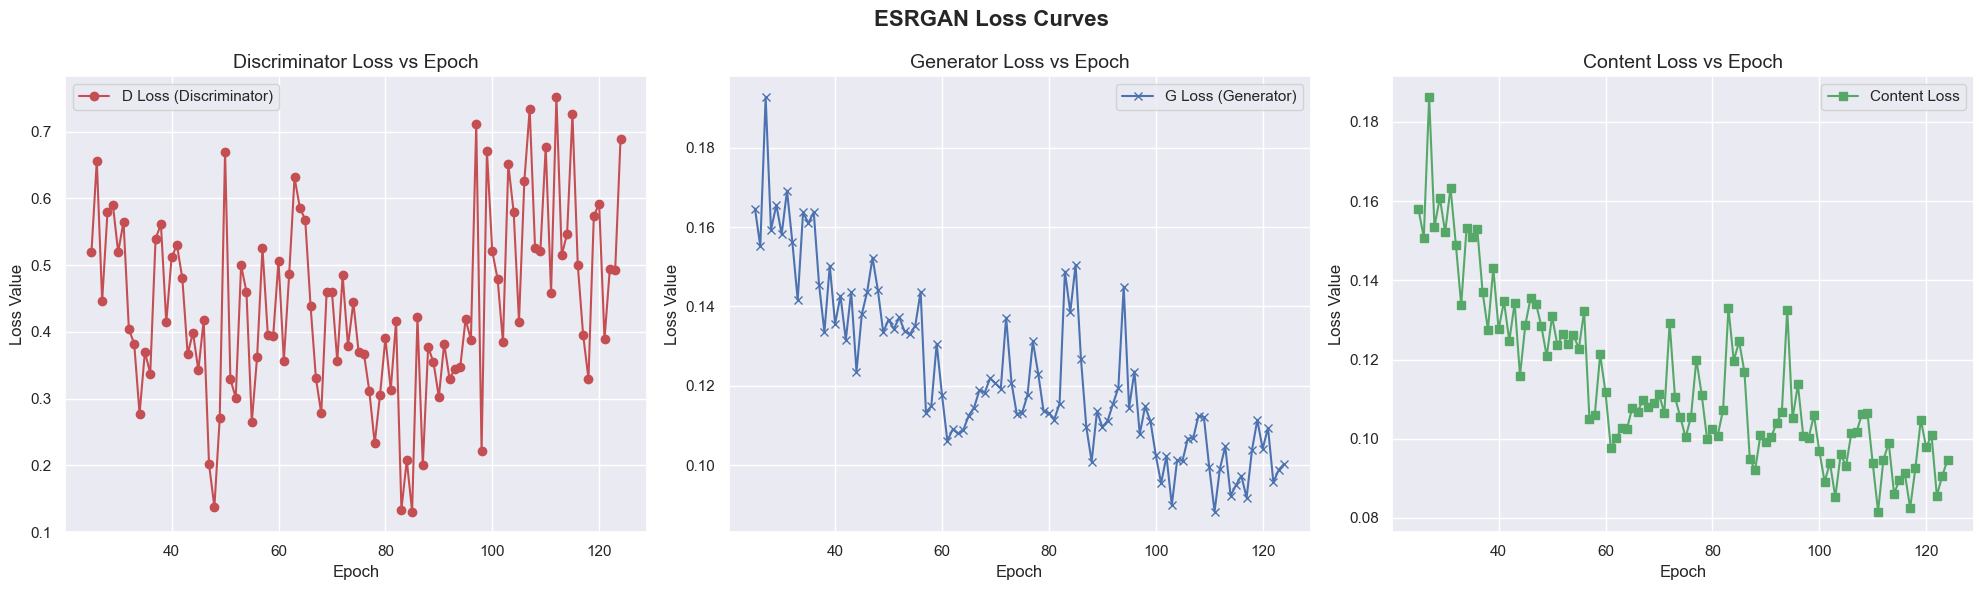

In [1]:
import re
import matplotlib.pyplot as plt

# 假设日志存储在一个文件中，文件路径为 'train_log.txt'
log_file_path = 'training_log.txt'

# 初始化数据存储
epochs = []
loss_D_list = []
loss_G_list = []
content_loss_list = []

# 读取日志文件并解析所需的数据
with open(log_file_path, 'r') as file:
    for line in file:
        # 解析每一行日志，提取 epoch, loss_D, loss_G, content_loss
        match = re.search(r"Epoch (\d+)/\d+.*Average D loss: ([\d\.]+), Average G loss: ([\d\.]+), Average content loss: ([\d\.]+)", line)
        
        if match:
            epoch = int(match.group(1))
            loss_D = float(match.group(2))
            loss_G = float(match.group(3))
            content_loss = float(match.group(4))
            
            # 只记录第 25 个 epoch 之后的数据
            if epoch >= 25:
                epochs.append(epoch)
                loss_D_list.append(loss_D)
                loss_G_list.append(loss_G)
                content_loss_list.append(content_loss)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置背景样式为 darkgrid
sns.set_theme(style="darkgrid")

# 创建 1 行 3 列的子图
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 1 行 3 列的子图

# 绘制 D 损失 (判别器损失)
axs[0].plot(epochs[:100], loss_D_list[:100], label='D Loss (Discriminator)', color='r', linestyle='-', marker='o')
axs[0].set_title('Discriminator Loss vs Epoch', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Loss Value', fontsize=12)
axs[0].grid(True)
axs[0].legend()

# 绘制 G 损失 (生成器总损失)
axs[1].plot(epochs[:100], loss_G_list[:100], label='G Loss (Generator)', color='b', linestyle='-', marker='x')
axs[1].set_title('Generator Loss vs Epoch', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Loss Value', fontsize=12)
axs[1].grid(True)
axs[1].legend()

# 绘制内容损失 (Content Loss)
axs[2].plot(epochs[:100], content_loss_list[:100], label='Content Loss', color='g', linestyle='-', marker='s')
axs[2].set_title('Content Loss vs Epoch', fontsize=14)
axs[2].set_xlabel('Epoch', fontsize=12)
axs[2].set_ylabel('Loss Value', fontsize=12)
axs[2].grid(True)
axs[2].legend()
fig.suptitle('ESRGAN Loss Curves', fontsize=16, fontweight='bold')

# 调整布局，避免标签重叠
plt.tight_layout()

plt.savefig('ESRGAN_Loss_Curve.png', dpi=1000)
# 显示图像
plt.show()
